In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#download the dataset from kaggle and provide the path here
df = pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


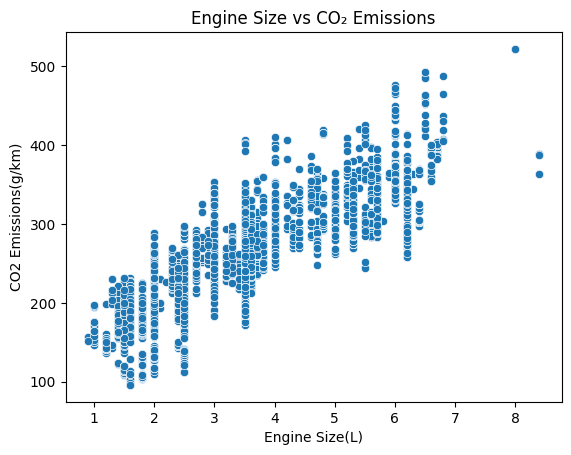

In [7]:
sns.scatterplot(
    x="Engine Size(L)",
    y="CO2 Emissions(g/km)",
    data=df
)
plt.title("Engine Size vs CO₂ Emissions")
plt.show()

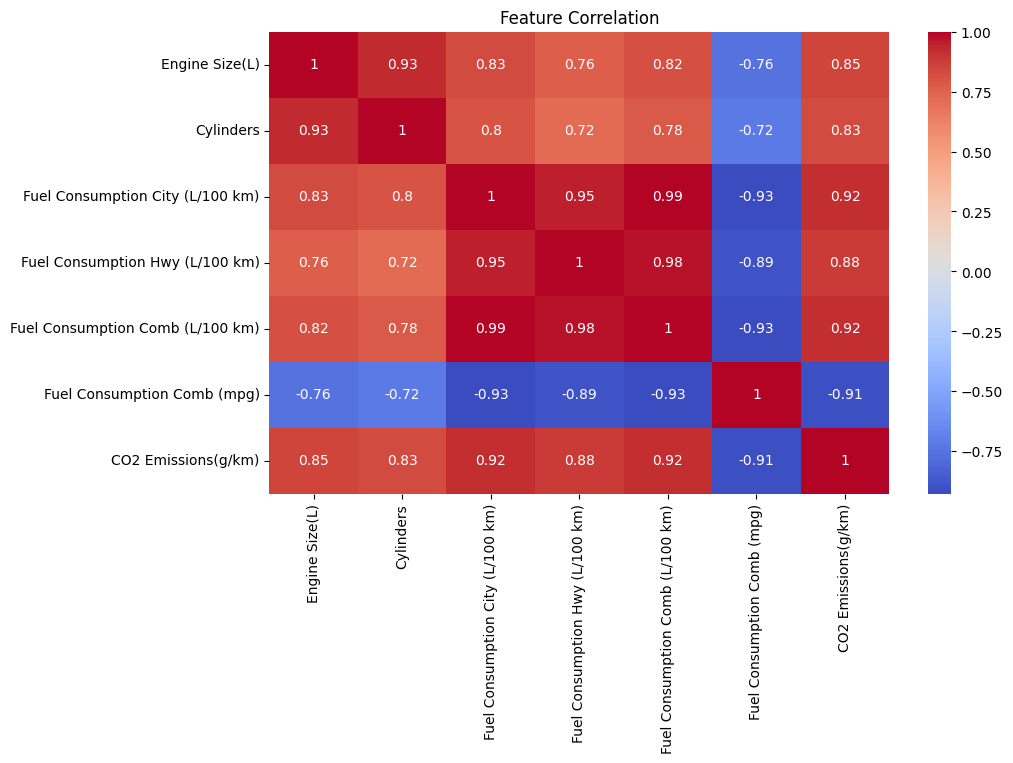

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

In [9]:
X = df[
    [
        "Engine Size(L)",
        "Cylinders",
        "Fuel Type",
        "Fuel Consumption City (L/100 km)",
        "Fuel Consumption Hwy (L/100 km)",
        "Vehicle Class"
    ]
]
y = df["CO2 Emissions(g/km)"]


In [10]:
numeric_features = [
    "Engine Size(L)",
    "Cylinders",
    "Fuel Consumption City (L/100 km)",
    "Fuel Consumption Hwy (L/100 km)"
]

categorical_features = [
    "Fuel Type",
    "Vehicle Class"
]
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
lr_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)

lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption City '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Hwy '
                                                   '(L/100 km)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel Type',
                                                   'Vehicle Class'])])),
                ('model', LinearRegression())])

In [12]:
rf_pipeline = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=200,
            random_state=42
        ))
    ]
)

rf_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption City '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Hwy '
                                                   '(L/100 km)']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel Type',
                                                   'Vehicle Class'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [13]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return mae, rmse, r2


In [14]:
lr_results = evaluate(lr_pipeline, X_test, y_test)
rf_results = evaluate(rf_pipeline, X_test, y_test)

print("Linear Regression:", lr_results)
print("Random Forest:", rf_results)


Linear Regression: (3.118281717203329, np.float64(5.546455283569166), 0.991056250429146)
Random Forest: (1.8057741310832456, np.float64(3.4176232238585382), 0.9966042402002889)


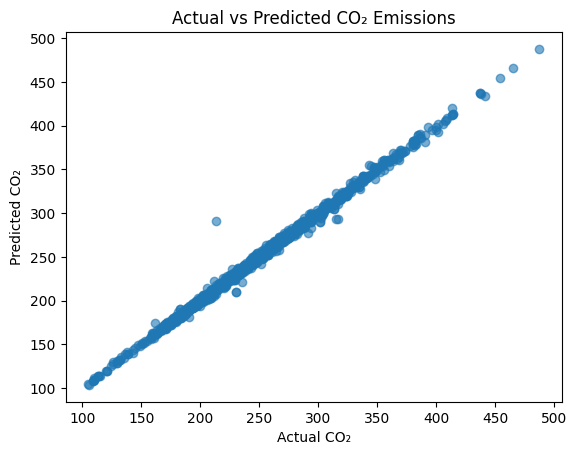

In [15]:
rf_model = rf_pipeline.named_steps["model"]

feature_names = (
    numeric_features +
    list(
        rf_pipeline.named_steps["preprocessor"]
        .named_transformers_["cat"]
        .get_feature_names_out(categorical_features)
    )
)

importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)
y_pred = rf_pipeline.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual CO₂")
plt.ylabel("Predicted CO₂")
plt.title("Actual vs Predicted CO₂ Emissions")
plt.show()


In [16]:
import joblib

joblib.dump(rf_pipeline, "co2_emission_model.pkl")


['co2_emission_model.pkl']